In [0]:
import nltk
nltk.download('punkt')

#https://www.nltk.org/_modules/nltk/tokenize/punkt.html for Tokenization

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
from google.colab import files
import io

#https://colab.research.google.com/notebooks/io.ipynb for uploading files

In [0]:
uploaded=files.upload()

# Upload tweets-dataset9.csv) here and let that was given the name "tweets-dataset.csv"

Saving tweets-dataset.csv to tweets-dataset (1).csv


In [0]:
import pandas as pd

df = pd.read_csv(io.BytesIO(uploaded['tweets-dataset.csv']))

In [0]:
# Checking the dataset

for tweet in df['Sentence'][:5]:
  print(tweet)

@BubblyDentist @MeetUunngLee nahi nahi, mere saath jaakar pachtaogi. Ye Uunnglee is the best. All girls say that
going to the grammys first entertainment law breakfast here in nyc tomorrow !  i'm so excited .  one step closer .  .  .
bohot hi badiya ji aap sunao?
Parvez Musharraf is Digvijay Singh of Pakistanhttps://twitter.com/IndiaToday/status/599994321610285058 …
guddu ko bass john cena k sticker ki padii hai :d :d


In [0]:
from nltk.tokenize import TweetTokenizer
tweet_tokenize=TweetTokenizer()

In [0]:
# Stats of Tokens, Types and TTR

import re

tokens=[]

for tweet in df['Sentence']:
  tweet=re.sub('(https?://[^\s]+|pic[^\s]+)|,|[.]', '', tweet.lower())
  tweet=tweet_tokenize.tokenize(tweet)
  tweet=[t for t in tweet if re.match(r'[a-z]*$', t)]
  tokens.extend(tweet)

types=set(tokens)

ttr=len(types)/len(tokens)

print(str(len(tokens))+' word tokens')
print(str(len(types))+' word types')
print('TTR = '+str(ttr))

282074 word tokens
30216 word types
TTR = 0.10712082644979687


In [0]:
import matplotlib.pyplot as plt

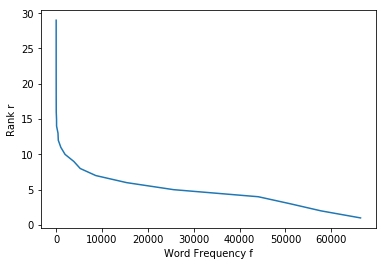

In [0]:
#Zipf's Law for length

freq_dict={}
for token in tokens:
  if len(token) in freq_dict:
    freq_dict[len(token)]=freq_dict[len(token)]+1
  else:
    freq_dict[len(token)]=1

freq_values=list(freq_dict.values())
freq_values.sort(reverse=True)

plt.plot(freq_values, [i for i in range(1, len(freq_values)+1)])
plt.ylabel('Rank r')
plt.xlabel('Word Frequency f')
plt.show()

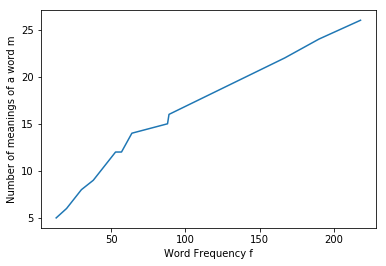

In [0]:
#Zipf's Law for meanings

#https://www.thesaurus.com/browse/search?s=t for synonyms

english_words=['lead', 'flight', 'pure', 'sorry', 'run', 'old', 'god', 'watch', 'same', 'see', 'night', 'love'] 

freq={'love':0, 'night':0, 'see':0, 'pure':0, 'run':0, 'flight':0, 'sorry':0, 'lead':0, 'same':0, 'god':0, 'old':0, 'watch':0}
synonyms={'love':['be crazy about','passion', 'beloved', 'dear', 'dearest', 'honey', 'enjoy', 'affection', 'emotion', 'devotion', 'fondness', 'respect', 'friendship', 'infatuation', 'yearning', 'know', 'do_it', 'be_intimate', 'romeo', 'dearest', 'angel', 'care for', 'worship', 'cherish', 'embrace', 'feel'],
           'night':['midnight','bedtime','black','blackness','dark','darkness','duskiness','evening','eventide','gloom','nightfall','nighttime','obscurity','twilight','after dark','after hours','before dawn','dark hours','dead of night','dim','nighttide','dusk to dawn','pitch dark','witching hour'],
           'see':['behold','penetrate', 'pierce','remark','view','watch','witness','beam','behold','clock','contemplate','descry','discern','distinguish','espy','eye','flash','gape','gawk','gaze','glare','glimpse'],
           'pure':['authentic','bright','classic','natural','neat','perfect','plain','real'],
           'run':['race', 'rush', 'sprut', 'escape', 'fly', 'pace', 'sprint','hop','jump','mount','bustle','canter'],
           'flight':['aeronautics','arrival', 'trip', 'jump', 'navigation', 'winging'],
           'sorry':['dismal', 'no-good', 'disconsolate', 'pitiful', 'regretful', 'good-for-nothing', 'apology', 'unhappy', 'sorrowful'],
           'lead':['precede', 'moderate', 'tip', 'chair', 'principal'],
           'same':['afore','carbon', 'xerox', 'clone', 'ditto', 'double', 'dupe', 'duplicate', 'equal', 'equivalent', 'like', 'look-alike', 'twin', 'constant', 'invariable', 'uniform'],
           'god':['holy spirit','immortal', 'graven_image', 'deity', 'divinity', 'God', 'Supreme_Being', 'idol', 'Allah', 'lord', 'master', 'holiness', 'almighty', 'creator'],
            'old': ['onetime', 'older', 'one-time', 'quondam', 'sure-enough', 'honest-to-god', 'former', 'Old', 'sometime', 'previous', 'honest-to-goodness', 'erstwhile'],
            'watch': ['keep_an_eye_on', 'scout', 'learn', 'vigil', 'check', 'observe', 'find_out', 'see', 'follow', 'view', 'lookout', 'catch', 'ascertain', 'ticker', 'sentinel']
         }

for token in tokens:
  if token in english_words:
    freq[token]=freq[token]+1

freq_values=[]
syn_values=[]
for word in english_words:
  freq_values.append(freq[word])
  syn_values.append(len(synonyms[word]))
  
plt.plot(freq_values, syn_values)
plt.ylabel('Number of meanings of a word m')
plt.xlabel('Word Frequency f')
plt.show()

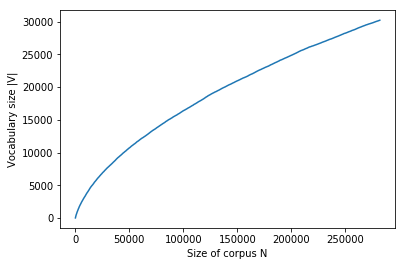

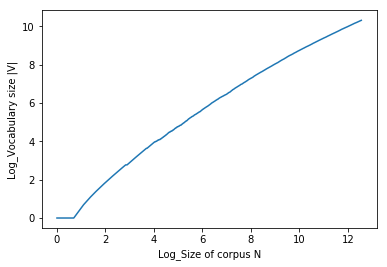

Beta of Heap's Law 0.6502057612164631
K value of Heap's Law 9.019713493875686


In [0]:
#Heap's Law

import numpy as np

n_values=[]
v_values=[]
n_log=[]
v_log=[]
unique_tokens=[]
for i in range(len(tokens)):
  n_values.append(i+1)
  n_log.append(np.log(i+1))
  if tokens[i] not in unique_tokens:
    unique_tokens.append(tokens[i])
  v_values.append(len(unique_tokens))
  v_log.append(np.log(len(unique_tokens)))

plt.plot(n_values, v_values)
plt.xlabel('Size of corpus N')
plt.ylabel('Vocabulary size |V|')
plt.show()

plt.plot(n_log, v_log)
plt.xlabel('Log_Size of corpus N')
plt.ylabel('Log_Vocabulary size |V|')
plt.show()

import math

beta, log_k= np.polyfit(n_log, v_log, 1)
k=math.exp(log_k)
print("Beta of Heap's Law", beta)
print("K value of Heap's Law", k)